<IPython.core.display.Javascript object>


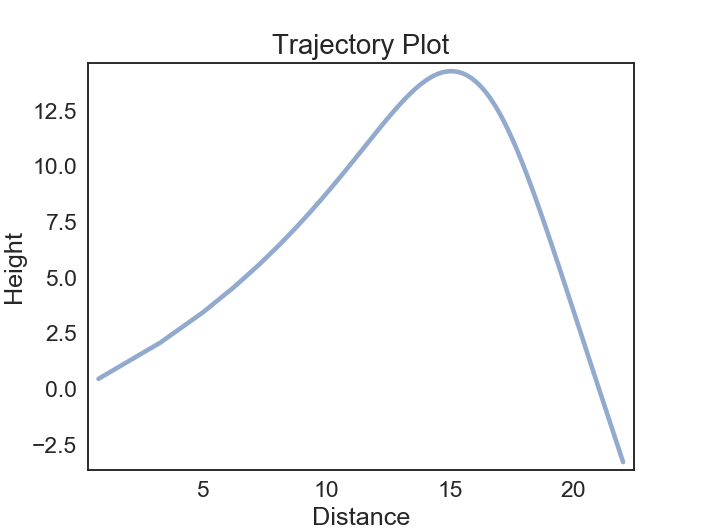

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<IPython.core.display.Javascript object>


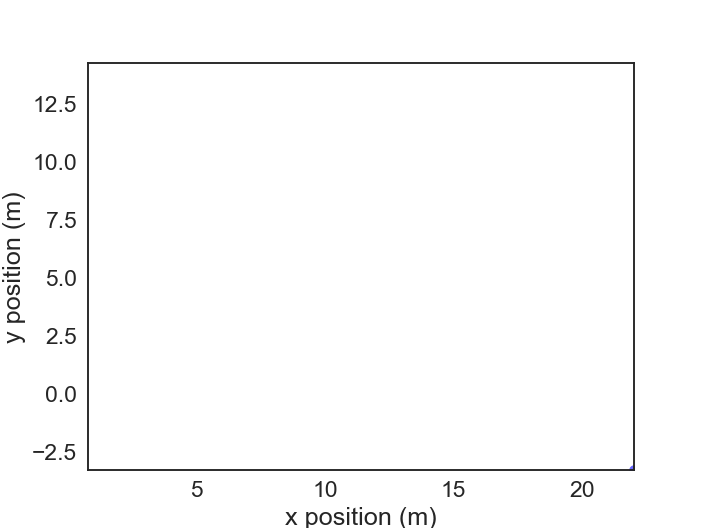

In [2]:
from modsim import *
from numpy import *
%matplotlib notebook


condition = Condition(angle = 30, #in degrees
                     mass = .0027, #in kilograms
                     diameter = .04, #in meters 
                     rho = 1.16, #air density in kg/m^3
                     C_d = .445, #unitless
                     cannon_length = .91,
                     velocity = 90,
                     duration = 4,
                     g=9.81,
                     omega = 0.0001) #meters

def make_system(condition):
    unpack(condition)
    theta = np.deg2rad(angle)
    vx, vy = pol2cart(theta, velocity)
    x, y = pol2cart(theta, cannon_length)
    init = State(x=x, y=y, vx=vx, vy=vy)
    area = np.pi * (diameter/2)**2
    ts = linspace(0, duration, 101)
    return System(init=init, g=g, mass=mass,
        area=area, rho=rho, C_d=C_d, ts=ts, omega=omega)

def slope_func(state,t,system):
    
    x,y,vx,vy = state
    unpack(system)
    
    v=Vector(vx,vy)
    
    a_grav = Vector(0,-g) #turning gravity into a vector
    a_drag = (-rho*v.mag*v*C_d*area/2)/mass #calculating acceleration due to drag
   
    
    a_magnus_mag = (abs((omega)*(v.mag**2)))/mass # calculating magnitude of magnus acceleration
    a_magnus_angle = v.angle + np.pi/2 # making angle of magnus acceleration perpendecular to direction of velocity
    magnus_x, magnus_y = pol2cart(a_magnus_angle * UNITS.radian,a_magnus_mag) # turning magnitude and angle into x and y components
    a_magnus = Vector(magnus_x, magnus_y) #turning components into a vector
    
    a = a_grav + a_drag + a_magnus #adding all accerlations together as vectors
    
   
    return vx, vy, a.x, a.y #dot operators are used for accleration because it is a vector

system=make_system(condition)
run_odeint(system,slope_func)



newfig()
plot(system.results.x, system.results.y)
decorate(title="Trajectory Plot",
        ylabel = "Height",
        xlabel = "Distance")

def animate2d(xs, ys, speedup=1):
    """Animate the results of a projectile simulation.
    
    xs: x position as a function of time
    ys: y position as a function of time
    
    speedup: how much to divide `dt` by
    """
    # get the time intervals between elements
    ts = xs.index
    dts = np.diff(ts)
    dts = np.append(dts, 0)

    # decorate the plot
    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=[xs.min(), xs.max()],
             ylim=[ys.min(), ys.max()],
             legend=False)

    # loop through the values
    for x, y, dt in zip(xs, ys, dts):
        plot(x, y, 'bo', update=True)
        sleep(dt / speedup)
        
xs = system.results.x
ys = system.results.y

animate2d(xs,ys)